In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import spearmanr

In [2]:
contestants_url = "https://raw.githubusercontent.com/tturocy/eco7026a/main/2022-23/contestants.csv"
votes_url = "https://raw.githubusercontent.com/tturocy/eco7026a/main/2022-23/votes.csv"

# Read the Data

In [3]:
contestants = pd.read_csv(contestants_url)
votes = pd.read_csv(votes_url)

# Explore Contestants Data 

In [4]:
contestants.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1734 entries, 0 to 1733
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   year               1734 non-null   int64  
 1   to_country_id      1734 non-null   object 
 2   to_country         1734 non-null   object 
 3   performer          1734 non-null   object 
 4   song               1731 non-null   object 
 5   place_contest      1678 non-null   float64
 6   sf_num             640 non-null    float64
 7   running_final      1398 non-null   float64
 8   running_sf         605 non-null    float64
 9   place_final        1397 non-null   float64
 10  points_final       1385 non-null   float64
 11  place_sf           605 non-null    float64
 12  points_sf          605 non-null    float64
 13  points_tele_final  181 non-null    float64
 14  points_jury_final  181 non-null    float64
 15  points_tele_sf     212 non-null    float64
 16  points_jury_sf     212 n

In [8]:
contestants.shape

(1734, 21)

In [6]:
contestants.head(5)

,year,to_country_id,to_country,performer,song,place_contest,sf_num,running_final,running_sf,place_final,...,place_sf,points_sf,points_tele_final,points_jury_final,points_tele_sf,points_jury_sf,composers,lyricists,lyrics,youtube_url
0,1956,ch,Switzerland,Lys Assia,Refrain,2.0,NaN,2.0,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,Georg Benz Stahl,NaN,"(Refrain d'amour...)\n\nRefrain, couleur du ci...",https://youtube.com/watch?v=IyqIPvOkiRk
1,1956,nl,Netherlands,Jetty Paerl,De Vogels Van Holland,2.0,NaN,1.0,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,Cor Lemaire,Annie M. G. Schmidt,De vogels van Holland zijn zo muzikaal\nZe ler...,https://youtube.com/watch?v=u45UQVGRVPA
2,1956,be,Belgium,Fud Leclerc,Messieurs Les Noyés De La Seine,2.0,NaN,3.0,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,Jacques Say;Jean Miret,Robert Montal,Messieurs les noyés de la Seine\nOuvrez-moi le...,https://youtube.com/watch?v=U9O3sqlyra0
3,1956,de,Germany,Walter Andreas Schwarz,Im Wartesaal Zum Großen Glück,2.0,NaN,4.0,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,Walter Andreas Schwarz,NaN,"Es gibt einen Hafen, da fährt kaum ein Schiff\...",https://youtube.com/watch?v=BDNARIDnmTc
4,1956,fr,France,Mathé Altéry,Le Temps Perdu,2.0,NaN,5.0,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,André Lodge,Rachèle Thoreau,"Chante, carillon\nLe chant du temps perdu\nCha...",https://youtube.com/watch?v=dm1L0XyikKI


# Explore Votes Data 

In [9]:
votes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51354 entries, 0 to 51353
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   year             51354 non-null  int64  
 1   round            51354 non-null  object 
 2   from_country_id  51354 non-null  object 
 3   to_country_id    51354 non-null  object 
 4   from_country     51354 non-null  object 
 5   to_country       51354 non-null  object 
 6   total_points     51354 non-null  int64  
 7   tele_points      11741 non-null  float64
 8   jury_points      11715 non-null  float64
dtypes: float64(2), int64(2), object(5)
memory usage: 3.5+ MB


In [10]:
votes.shape

(51354, 9)

In [11]:
votes.head(10)

,year,round,from_country_id,to_country_id,from_country,to_country,total_points,tele_points,jury_points
0,1957,final,at,nl,at,nl,6,NaN,NaN
1,1957,final,at,fr,at,fr,0,NaN,NaN
2,1957,final,at,dk,at,dk,0,NaN,NaN
3,1957,final,at,lu,at,lu,3,NaN,NaN
4,1957,final,at,de,at,de,0,NaN,NaN
5,1957,final,at,it,at,it,0,NaN,NaN
6,1957,final,at,gb,at,gb,1,NaN,NaN
7,1957,final,at,be,at,be,0,NaN,NaN
8,1957,final,at,ch,at,ch,0,NaN,NaN
9,1957,final,at,at,at,at,0,NaN,NaN


# Filter Contestants and Votes to use Data For the Years with Current Point System 

In [13]:
current_point_system_start_year = 1975
# Filter contestants and votes datasets based on the detected year
contestants = contestants[(contestants['year'] >= current_point_system_start_year)]
votes = votes[(votes['year'] >= current_point_system_start_year) & (votes['round'] == 'final')]

# Explore Data Sets after Filtering 

In [14]:
contestants.shape

(1446, 21)

In [15]:
votes.shape

(33140, 9)

# Question 1a : Data Consistency Check for Contestants Votes

In [17]:
def contestants_votes_consistency_check(contestants , votes):
    contestants_points_final = contestants[['year', 'to_country_id', 'points_final']].dropna(subset=['points_final'])
    contestants_points_final.rename(columns={'points_final': 'total_points' , 'to_country_id' : 'to_country'}, inplace=True)
    
    contestant_points = contestants_points_final['total_points']
    votes_total_points = votes.groupby(['year', 'to_country'])['total_points'].sum().reset_index()['total_points']

    # Sort the arrays
    contestant_points_sorted = np.sort(contestant_points.to_numpy())
    votes_total_points_sorted = np.sort(votes_total_points.to_numpy())

    # Compare the sorted arrays
    points_check = np.array_equal(contestant_points_sorted, votes_total_points_sorted)

    # Print the result of the comparison
    print("\nInternal Consistency Verification:")
    print("Points Consistency:", points_check)
contestants_votes_consistency_check(contestants,votes)


Internal Consistency Verification:
Points Consistency: True


In [28]:
def check_rank_consistency(contestants):
    inconsistent_entries = []
    #Clean the contestants dataframe by dropping rows whose points_final is NaN
    contestants_df = contestants[['to_country' , 'year', 'points_final', 'place_final']].dropna(subset=['points_final' , 'place_final'])
    nine = contestants_df[(contestants_df['year'] == 1975)]
    print(nine)
    for index, contestant in contestants_df.iterrows():

        # Verify ranking of contestants
        expected_rank = contestants_df[contestants_df['year'] == contestant['year']].sort_values(by='points_final', ascending=False).reset_index(drop=True)
        if contestant['place_final'] != expected_rank[expected_rank['to_country'] == contestant['to_country']].index[0] + 1:
            inconsistent_entries.append(f"Year: {contestant['year']}, Country: {contestant['to_country']}, Rank Mismatch")

    # Report discrepancies
    if inconsistent_entries:
        print("Discrepancies found:")
        for entry in inconsistent_entries:
            print(entry)
    else:
        print("No discrepancies found.")
check_rank_consistency(contestants)

         to_country  year  points_final  place_final
604          Sweden  1991         146.0          1.0
605          France  1991         146.0          2.0
606          Israel  1991         139.0          3.0
607           Spain  1991         119.0          4.0
608     Switzerland  1991         118.0          5.0
609           Malta  1991         106.0          6.0
610           Italy  1991          89.0          7.0
611        Portugal  1991          62.0          8.0
612          Cyprus  1991          60.0          9.0
613         Ireland  1991          47.0         10.0
614  United Kingdom  1991          47.0         10.0
615          Turkey  1991          44.0         12.0
616          Greece  1991          36.0         13.0
617      Luxembourg  1991          29.0         14.0
618         Iceland  1991          26.0         15.0
619         Belgium  1991          23.0         16.0
620          Norway  1991          14.0         17.0
621         Germany  1991          10.0       

# 2. Most and least successful countries

The most successful countries based on mean are:

 to_country
Bulgaria     283.000000
Australia    219.857143
Ukraine      201.277778
Name: points_final, dtype: float64

The least successful countries based on mean are:

 to_country
Morocco        7.0
Slovakia      14.0
Montenegro    40.5
Name: points_final, dtype: float64


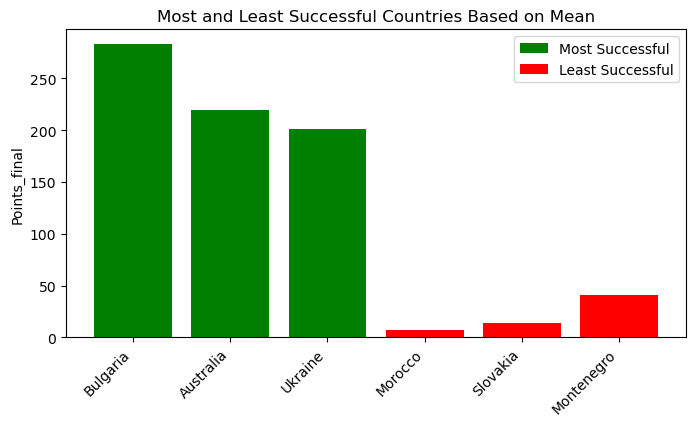

In [32]:
def most_least_successful(contestants, votes):
    # Define success measure 
    success_measure = 'points_final'
    
    # mean and median success measures for each country
    country_mean_success = contestants.groupby('to_country')[success_measure].mean()

    # Identify most and least successful countries based on mean
    most_successful_countries_mean = country_mean_success.nlargest(3)
    least_successful_countries_mean = country_mean_success.nsmallest(3)

   

    print("The most successful countries based on mean are:")
    print("\n", most_successful_countries_mean)
    
    print("\nThe least successful countries based on mean are:")
    print("\n", least_successful_countries_mean)
    # Plot bar chart
    plt.figure(figsize=(8, 4))

    # Plot most successful countries
    plt.bar(most_successful_countries_mean.index, most_successful_countries_mean, color='green', label='Most Successful')

    # Plot least successful countries
    plt.bar(least_successful_countries_mean.index, least_successful_countries_mean, color='red', label='Least Successful')

    plt.ylabel(success_measure.capitalize())
    plt.title('Most and Least Successful Countries Based on Mean')
    plt.legend()
    plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for better visibility
    plt.show()

most_least_successful(contestants, votes)

# 3. Ordering Effects Analysis 


Ordering Effects Analysis:
running_final
1.0     12.312500
2.0     15.437500
3.0     13.666667
4.0     13.687500
5.0     13.625000
6.0     12.812500
7.0     12.291667
8.0     12.270833
9.0     11.250000
10.0    11.916667
11.0    10.854167
12.0    10.333333
13.0    12.541667
14.0    12.145833
15.0    12.979167
16.0    13.833333
17.0    10.750000
18.0    11.125000
19.0    10.933333
20.0     9.925000
21.0    12.777778
22.0    10.400000
23.0    10.838710
24.0    10.538462
25.0    11.550000
26.0    17.000000
27.0     3.000000
Name: place_final, dtype: float64

Spearman's Rank Correlation Coefficient: -0.49328449328449325
P-value: 0.008934226203302928


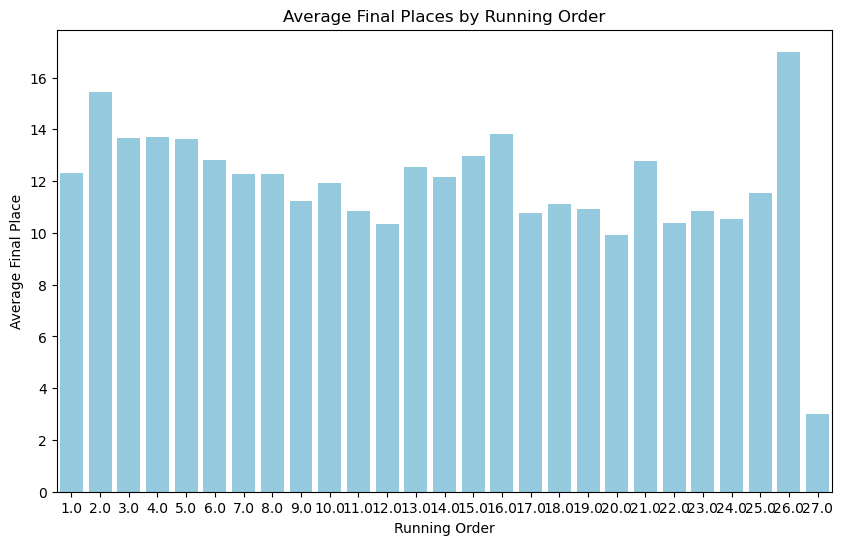

In [35]:
def order_effects_analysis(contestants):
    # Investigate potential ordering effects
    order_effects = contestants.groupby('running_final')['place_final'].mean()

    # Test for correlation (Spearman's rank correlation coefficient)
    correlation, p_value = spearmanr(order_effects.index, order_effects.values)
    
    # Print results
    print("\nOrdering Effects Analysis:")
    print(order_effects)
    print("\nSpearman's Rank Correlation Coefficient:", correlation)
    print("P-value:", p_value)
    
    # Create a bar plot
    plt.figure(figsize=(10, 6))
    sns.barplot(x=order_effects.index, y=order_effects.values, color='skyblue')
    plt.title('Average Final Places by Running Order')
    plt.xlabel('Running Order')
    plt.ylabel('Average Final Place')
    plt.show()

# Assuming 'contestants' is your DataFrame
order_effects_analysis(contestants)

# 4. Reciprocity analysis up to 2015


Reciprocity Analysis (Up to 2015):
Number of Reciprocal Pairs: 8094

Reciprocal Pairs:
     from_country to_country
0              be         lu
1              be         fi
2              be         mc
3              be         be
4              be         pt
...           ...        ...
8089           gb         cy
8090           gb         gb
8091           gb         fr
8092           gb         at
8093           gb         de

[8094 rows x 2 columns]


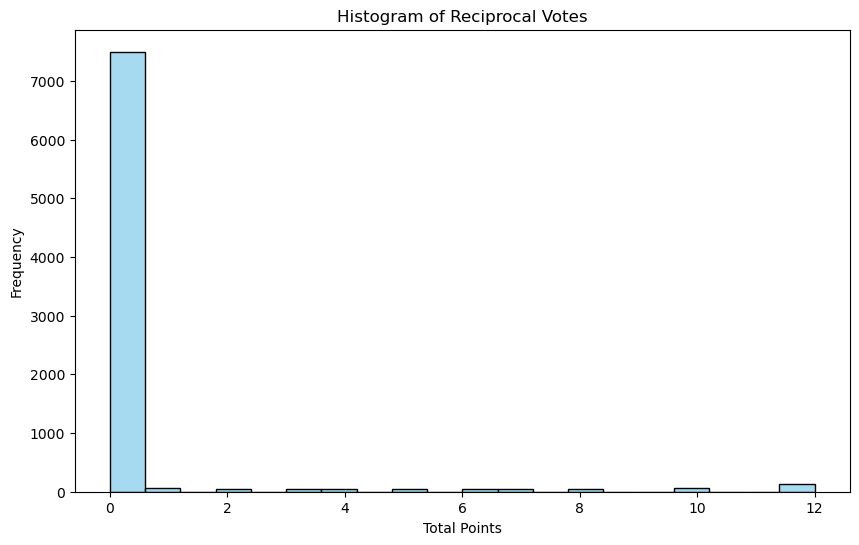

In [46]:

def reciprocity_analysis(votes):
    # Filter data up to and including 2015
    votes_sub_2015 = votes[votes['year'] <= 2015]
    
    # Identify reciprocal pairs
    reciprocal_pairs = votes_sub_2015.merge(votes_sub_2015.rename(columns={'from_country': 'to_country', 'to_country': 'from_country'}),
                                            on=['year', 'from_country', 'to_country', 'total_points'], how='inner')
    
    # Print evidence of reciprocity and countries that reciprocate votes
    print("\nReciprocity Analysis (Up to 2015):")
    print("Number of Reciprocal Pairs:", len(reciprocal_pairs))
    if not reciprocal_pairs.empty:
        print("\nReciprocal Pairs:")
        print(reciprocal_pairs[['from_country', 'to_country']])
    
     # Plot a histogram of reciprocal votes
    if not reciprocal_pairs.empty:
        plt.figure(figsize=(10, 6))
        sns.histplot(reciprocal_pairs['total_points'], bins=20,  color='skyblue', edgecolor='black')
        plt.title('Histogram of Reciprocal Votes')
        plt.xlabel('Total Points')
        plt.ylabel('Frequency')
        
        
        plt.show()

reciprocity_analysis(votes)

# 5. Jury vs Public voting analysis from 2016 onwards


Jury vs Public Voting Analysis (2016 onwards):
to_country
al    0.574586
at    0.578488
az    0.642820
bg    0.673235
ch    0.720741
cz    0.508851
dk    0.552284
es    0.747721
fr    0.777512
ge    0.713995
hr    0.578297
ie    0.658238
is    0.746565
lt    0.567615
md    0.596580
mt    0.638516
no    0.536409
pt    0.825755
rs    0.758355
se    0.690396
sm    0.439962
Name: jury_points, dtype: float64


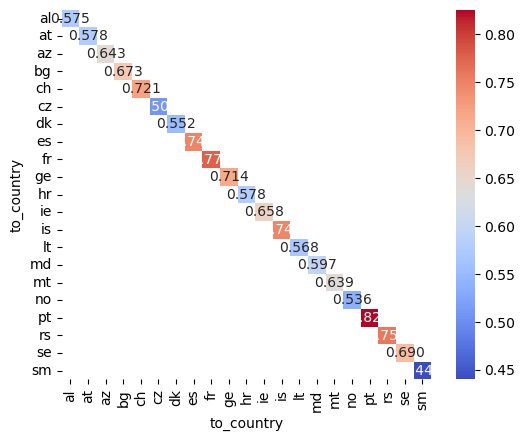

In [37]:
def jury_vs_public_analysis(contestants, votes):
    # Filter data from 2016 onwards
    contestants_2016_onwards = contestants[contestants['year'] >= 2016]
    votes_2016_onwards = votes[votes['year'] >= 2016]
    
    # Calculate correlation between jury and public voting
    correlation = votes_2016_onwards.groupby('to_country')[['tele_points', 'jury_points']].corr().groupby(level=0).mean().iloc[0::2, -1]

    # Print correlation results
    print("\nJury vs Public Voting Analysis (2016 onwards):")
    print(correlation)

    # Create a DataFrame from the correlation results
    correlation_df = pd.DataFrame(correlation)
    
    # Reset the index for better visualization
    correlation_df.reset_index(inplace=True)
    
    # Create a pivot table for better visualization
    correlation_matrix = correlation_df.pivot_table(index='to_country', columns='to_country', values='jury_points', aggfunc='mean')

    # Plot the heatmap
    sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".3f", square=True)

    # Show the plot
    plt.show()

jury_vs_public_analysis(contestants, votes)